> Xây dựng mô hình từ giải thuật SVM trên dữ liệu các con thú trong rừng.

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Tổng quan về bộ dữ liệu
Bộ dữ liệu “Animal Condition Classification Dataset” mang đến một thách thức thú vị và phức tạp trong lĩnh vực đánh giá tình trạng sức khỏe động vật. Dữ liệu bao gồm nhiều loài khác nhau, từ chim đến động vật có vú, cho phép phát triển các mô hình dự đoán nhằm xác định xem tình trạng của một cá thể động vật có nguy hiểm hay không dựa trên năm triệu chứng đặc trưng. Sự đa dạng này giúp mở ra khả năng xây dựng một hệ thống phân loại vượt qua ranh giới loài, đặc biệt hữu ích cho những người quan tâm đến phúc lợi động vật và bảo tồn thiên nhiên hoang dã.

Tuy nhiên, do được thu thập thủ công, bộ dữ liệu có thể chứa sai sót chính tả hoặc sự không thống nhất trong cách biểu diễn triệu chứng, đòi hỏi quá trình làm sạch dữ liệu tỉ mỉ và cẩn trọng. Khi làm việc với bộ dữ liệu này, người nghiên cứu có thể phải đối mặt với các thách thức như mất cân bằng lớp dữ liệu (class imbalance) và nhu cầu thiết kế đặc trưng (feature engineering) để nâng cao độ chính xác mô hình.

Nhìn chung, bộ dữ liệu này là một nguồn tài nguyên quý giá cho những ai mong muốn đóng góp vào lĩnh vực đánh giá sức khỏe động vật, đồng thời yêu cầu sự chính xác, đạo đức và phương pháp luận nghiêm ngặt để mang lại kết quả đáng tin cậy và có ý nghĩa thực tiễn.

## Cấu trúc về bộ dữ liệu

 Bộ dữ liệu Animal Condition Classification Dataset bao gồm thông tin về các loài động vật cùng năm triệu chứng chính, được sử dụng để xác định xem tình trạng sức khỏe của chúng có nguy hiểm hay không. Cấu trúc dữ liệu được thể hiện qua các cột như sau:
 - AnimalName: Tên hoặc loại động vật (ví dụ: Dog, Cat, Bird, v.v.), dùng để xác định loài mà mẫu dữ liệu thuộc về.
 - symptoms1 – symptoms5: Năm triệu chứng chính được ghi nhận ở mỗi cá thể động vật, mô tả tình trạng sức khỏe của chúng. Các triệu chứng này có thể bao gồm các biểu hiện như Fever, Coughing, Vomiting, Weight loss, Difficulty breathing, v.v.
 - Dangerous: Nhãn phân loại mục tiêu (target label), xác định tình trạng sức khỏe tổng thể của động vật là nguy hiểm (**Yes**) hoặc không nguy hiểm (**No**). Đây là cột đầu ra được sử dụng trong bài toán phân loại nhị phân (binary classification).

Bộ dữ liệu bao gồm nhiều bản ghi, trong đó mỗi bản ghi đại diện cho một cá thể động vật với năm triệu chứng được quan sát. Do dữ liệu được thu thập thủ công, một số giá trị có thể trùng lặp hoặc bị sai chính tả, đòi hỏi các bước xử lý tiền đề như chuẩn hóa văn bản, loại bỏ dữ liệu trùng, và mã hóa đặc trưng trước khi đưa vào huấn luyện mô hình.

In [ ]:
import pandas as pd

df=pd.read_csv('../dataset/data.csv')
df

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
0,Dog,Fever,Diarrhea,Vomiting,Weight loss,Dehydration,Yes
1,Dog,Fever,Diarrhea,Coughing,Tiredness,Pains,Yes
2,Dog,Fever,Diarrhea,Coughing,Vomiting,Anorexia,Yes
3,Dog,Fever,Difficulty breathing,Coughing,Lethargy,Sneezing,Yes
4,Dog,Fever,Diarrhea,Coughing,Lethargy,Blue Eye,Yes
...,...,...,...,...,...,...,...
866,Buffaloes,Fever,Difficulty breathing,Poor Appetite,Eye and Skin change,Unable to exercise,Yes
867,Buffaloes,Fever,Loss of appetite,Lession on the skin,Lethargy,Joint Pain,Yes
868,Buffaloes,Lesions in the nasal cavity,Lesions on nose,Vomiting,Noisy Breathing,Lesions on nose,Yes
869,Buffaloes,Hair loss,Dandruff,Vomiting,Crusting of the skin,Ulcerated skin,Yes


## Đặc điểm bộ dữ liệu

In [8]:
# Hiển thị thông tin tổng quan về dữ liệu
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   AnimalName  871 non-null    object
 1   symptoms1   871 non-null    object
 2   symptoms2   871 non-null    object
 3   symptoms3   871 non-null    object
 4   symptoms4   871 non-null    object
 5   symptoms5   871 non-null    object
 6   Dangerous   869 non-null    object
dtypes: object(7)
memory usage: 47.8+ KB


- Bộ dữ liệu bao gồm 871 mẫu dữ liệu (entries), được đánh số từ 0 đến 870.
- Tổng cộng có 7 cột dữ liệu (columns), tất cả đều thuộc kiểu chuỗi ký tự (object).
- Trong đó, 6 cột đầu tiên (AnimalName và symptoms1–symptoms5) có đầy đủ 871 giá trị, không chứa dữ liệu bị thiếu.
- Cột Dangerous — là nhãn phân loại mục tiêu — có 869 giá trị hợp lệ, tức là còn 2 giá trị bị thiếu (NaN).

> Bộ dữ liệu cần được xử lý bổ sung ở bước tiền xử lý, bao gồm việc kiểm tra và xử lý giá trị bị thiếu trong cột “Dangerous”, cũng như chuẩn hóa các giá trị văn bản trong các cột triệu chứng để đảm bảo tính nhất quán khi huấn luyện mô hình học máy.

In [9]:
# Thống kê mô tả các cột
df.describe()

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
count,871,871,871,871,871,871,869
unique,46,232,230,229,217,203,2
top,Buffaloes,Fever,Diarrhea,Coughing,Weight loss,Pains,Yes
freq,129,257,119,95,117,99,849


- Bộ dữ liệu có 46 loài động vật khác nhau, trong đó Buffaloes (Trâu) là loài xuất hiện nhiều nhất với 129 mẫu dữ liệu.
- Các triệu chứng có số lượng giá trị khác nhau khá lớn:
    - symptoms1 có 232 giá trị duy nhất, trong đó triệu chứng phổ biến nhất là Fever (Sốt).
    - symptoms2 có 230 giá trị duy nhất, phổ biến nhất là Diarrhea (Tiêu chảy).
    - symptoms3 có 229 giá trị duy nhất, phổ biến nhất là Coughing (Ho).
    - symptoms4 có 217 giá trị duy nhất, phổ biến nhất là Weight loss (Sút cân).
    - symptoms5 có 203 giá trị duy nhất, phổ biến nhất là Pains (Đau nhức).
- Cột Dangerous chỉ có 2 giá trị phân loại là Yes và No, trong đó 849 mẫu (chiếm đa số) được gán nhãn là “Yes”. Điều này cho thấy bộ dữ liệu mất cân bằng lớp (class imbalance), cần được xử lý ở giai đoạn tiền xử lý để tránh mô hình học máy bị thiên lệch.

> Bộ dữ liệu có mức độ đa dạng cao ở các triệu chứng, phản ánh thực tế sinh học phong phú của các loài động vật. Tuy nhiên, do sự chênh lệch lớn giữa hai nhãn trong cột Dangerous, việc cân bằng dữ liệu (ví dụ: dùng kỹ thuật oversampling hoặc undersampling) là cần thiết để mô hình học máy có thể phân loại chính xác hơn.

## Xử lý dữ liệu

In [10]:
# kiểm tra xem trong mỗi cột của DataFrame có bao nhiêu giá trị bị thiếu (NaN).
df.isna().sum()

AnimalName    0
symptoms1     0
symptoms2     0
symptoms3     0
symptoms4     0
symptoms5     0
Dangerous     2
dtype: int64

- Sáu cột đầu tiên (AnimalName, symptoms1 → symptoms5) → không có giá trị bị thiếu (tất cả đều đầy đủ dữ liệu).
- Cột Dangerous có 2 giá trị bị thiếu (NaN). -> có 2 mẫu động vật không được gán nhãn “nguy hiểm” hay “không nguy hiểm”.

In [11]:
# tìm kiếm dữ liệu bị thiếu trong file data
df[(df['Dangerous'] != 'Yes') & (df['Dangerous'] != 'No')]

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
269,Sheep,Teeth griding,Apathy,Dehydration,Ruminal stasis,Watery faeces,NaN
695,Buffaloes,Teeth griding,Apathy,Dehydration,Ruminal stasis,Watery faeces,NaN


- Hai dòng này chính là những bản ghi bị thiếu giá trị trong cột Dangerous, như bạn đã phát hiện trước đó bằng df.isna().sum().

In [12]:
#loại bỏ 2 bản ghi bị thiếu giá trị trong cột Dangerous
df.dropna(inplace=True)

- dropna() là hàm loại bỏ dữ liệu bị thiếu.
- Mặc định, nó xóa các hàng có ít nhất một ô là NaN.
- inplace=True nghĩa là thực hiện thay đổi trực tiếp trên df,

In [15]:
df[(df['Dangerous'] != 'Yes') & (df['Dangerous'] != 'No')]

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous


- Dữ liệu sau khi đã xóa bản ghi thiếu.

In [16]:
# kiểm tra dữ liệu bị trùng lặp trong bộ dữ liệu data.csv
df[df.duplicated()]

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
772,Tiger,Fetopelvic dispropotion,Uteria inertia,Malpresentation,Death,Pains,Yes
773,Tiger,Fetopelvic dispropotion,Uteria inertia,Malpresentation,Death,Pains,Yes
774,Tiger,Fetopelvic dispropotion,Uteria inertia,Malpresentation,Death,Pains,Yes
775,Tiger,Fetopelvic dispropotion,Uteria inertia,Malpresentation,Death,Pains,Yes
776,Tiger,Fetopelvic dispropotion,Uteria inertia,Malpresentation,Death,Pains,Yes
777,Tiger,Fetopelvic dispropotion,Uteria inertia,Malpresentation,Death,Pains,Yes
778,Tiger,Fetopelvic dispropotion,Uteria inertia,Malpresentation,Death,Pains,Yes
779,Tiger,Fetopelvic dispropotion,Uteria inertia,Malpresentation,Death,Pains,Yes
780,Tiger,Fetopelvic dispropotion,Uteria inertia,Malpresentation,Death,Pains,Yes
781,Tiger,Fetopelvic dispropotion,Uteria inertia,Malpresentation,Death,Pains,Yes


In [19]:
# đếm sô dòng dữ liệu bị trùng lắp
df.duplicated().sum()

np.int64(28)

- có 28 dòng dữ liệu bị trùng lặp

In [20]:
# xóa các dòng bị trùng lắp
df.drop_duplicates(inplace=True)

In [21]:
print("Sau khi xóa trùng, còn lại:", len(df))

Sau khi xóa trùng, còn lại: 841


- Sau khi xóa dữ liệu trùng lặp và dữ liệu bị thiếu thì dữ liệu có dự thay đổi về dòng (từ 871 dòng -> 841 dòng)

In [22]:
df.AnimalName.value_counts()

AnimalName
Buffaloes            128
Sheep                109
Pig                   63
Fowl                  62
Elephant              59
Duck                  56
Birds                 37
cat                   36
Dog                   34
Donkey                33
Monkey                28
Goat                  26
Deer                  26
Cattle                21
Hamster               18
Lion                  16
Rabbit                11
Horse                 10
Chicken                9
Fox                    7
Tiger                  6
Other Birds            6
horse                  5
chicken                4
Turtle                 4
cow                    3
Pigs                   3
Goats                  2
donkey                 2
cattle                 1
Fox                    1
mammal                 1
snake                  1
duck                   1
mules                  1
Elk                    1
Wapiti                 1
Mule deer              1
Reindeer               1
White-tailed d

- Sau khi đếm tần suất bằng lệnh df.AnimalName.value_counts(), ta nhận thấy bộ dữ liệu chứa tổng cộng nhiều loài động vật khác nhau với mức độ xuất hiện không đồng đều.
- Một số loài xuất hiện với tần suất cao như:
    - Buffaloes (128 lần)
    - Sheep (109 lần)
    - Pig (63 lần)
    - Fowl (62 lần)
    - Elephant (59 lần)
    - Duck (56 lần)
    - Trong khi đó, nhiều loài chỉ xuất hiện rất ít, chẳng hạn như Sika deer, Reindeer, Wolves, hay Hyaenas chỉ có 1 mẫu.

- Đáng chú ý, dữ liệu còn tồn tại sự không thống nhất trong cách viết tên loài, ví dụ:
    - `cat` và `Dog` viết thường hoặc hoa khác nhau,
    - `chicken` và `Chicken`, `horse` và `Horse`,
    - `Goat` và `Goats`, `Pig` và `Pigs`, v.v.
- Những điểm này cho thấy cần phải chuẩn hóa cột `AnimalName` bằng cách viết hoa chữ cái đầu và viết thường phần còn lại, giúp các giá trị như "dog", "Dogs" được đồng nhất thành "Dog".
- Sau bước chuẩn hóa, việc thống kê và huấn luyện mô hình sẽ phản ánh đúng bản chất dữ liệu, tránh sai lệch do trùng nghĩa khác dạng.

In [23]:
df['AnimalName']=df.AnimalName.str.capitalize()

- lệnh `df['AnimalName'] = df.AnimalName.str.capitalize()` được áp dụng, giúp viết hoa chữ cái đầu tiên và viết thường các ký tự còn lại. Việc này đảm bảo các giá trị như cùng nghĩa đều được quy về một dạng chuẩn, tránh trùng lặp dữ liệu không cần thiết.

In [24]:
df.AnimalName.value_counts()

AnimalName
Buffaloes            128
Sheep                109
Pig                   63
Fowl                  62
Elephant              59
Duck                  57
Birds                 37
Cat                   36
Donkey                35
Dog                   34
Monkey                28
Deer                  26
Goat                  26
Cattle                22
Hamster               18
Lion                  16
Horse                 15
Chicken               13
Rabbit                11
Fox                    7
Tiger                  6
Other birds            6
Turtle                 4
Pigs                   3
Cow                    3
Goats                  2
Mammal                 1
Fox                    1
Snake                  1
Mules                  1
Elk                    1
Wapiti                 1
Mule deer              1
Reindeer               1
White-tailed deer      1
Sika deer              1
Black-tailed deer      1
Moos                   1
Dogs                   1
Wolves        

- Dữ liệu sau khi đã được chuẩn hóa và nó thay thế các biến thể (dạng viết khác nhau hoặc dạng số nhiều) của cùng một loài bằng một tên thống nhất.

In [26]:
df['AnimalName'].replace({'Black-tailed deer':'Deer','White-tailed deer':'Deer','Mule deer':'Deer','Sika deer':'Deer','Reindeer':'Deer','Elk':'Deer','Wapiti':'Deer','Mules':'Horse','Other birds': 'Birds','Pigs':'Pig', 'Dogs': 'Dog', 'Fox ':'Fox', 'Goats': 'Goat'}, inplace = True)

In [27]:
df.AnimalName.value_counts()

AnimalName
Buffaloes    128
Sheep        109
Pig           66
Fowl          62
Elephant      59
Duck          57
Birds         43
Cat           36
Donkey        35
Dog           35
Deer          33
Monkey        28
Goat          28
Cattle        22
Hamster       18
Lion          16
Horse         16
Chicken       13
Rabbit        11
Fox            8
Tiger          6
Turtle         4
Cow            3
Mammal         1
Moos           1
Snake          1
Wolves         1
Hyaenas        1
Name: count, dtype: int64

- Sau khi chuẩn hóa các tên loài bằng phương thức `replace()`, tiến hành kiểm tra lại dữ liệu trùng lặp vì quá trình gộp tên có thể khiến một số dòng trở nên giống hệt nhau. Việc loại bỏ trùng lặp lần cuối giúp đảm bảo dữ liệu duy nhất, chính xác và sẵn sàng cho các bước phân tích tiếp theo.

In [28]:
df[df.duplicated()]

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
402,Deer,wasting,stumbling,listlessness,drooling,urination problem,Yes
403,Deer,wasting,stumbling,listlessness,drooling,urination problem,Yes
404,Deer,wasting,stumbling,listlessness,drooling,urination problem,Yes
405,Deer,wasting,stumbling,listlessness,drooling,urination problem,Yes
406,Deer,wasting,stumbling,listlessness,drooling,urination problem,Yes
407,Deer,wasting,stumbling,listlessness,drooling,drooping ears,Yes
408,Deer,wasting,stumbling,listlessness,drooling,drooping ears,Yes
818,Donkey,sweating,dry or tacky gums,reduced appetite,lying down,dull ness,Yes
819,Donkey,outstretched neck,dull ness,inappetence,noisy breathing,coughing,Yes


In [29]:
df.drop_duplicates(inplace=True)
print("Sau khi xóa trùng, còn lại:", len(df))

Sau khi xóa trùng, còn lại: 832


In [30]:
def pie(col):
    data_counts =df[col].value_counts()
    plt.pie(data_counts, labels=data_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    plt.set_title(f'Pie plot for {col}')
    plt.show()

In [31]:
for col in df.columns: 
    print(f'Type of {col} column is {df[col].dtype}')

Type of AnimalName column is object
Type of symptoms1 column is object
Type of symptoms2 column is object
Type of symptoms3 column is object
Type of symptoms4 column is object
Type of symptoms5 column is object
Type of Dangerous column is object


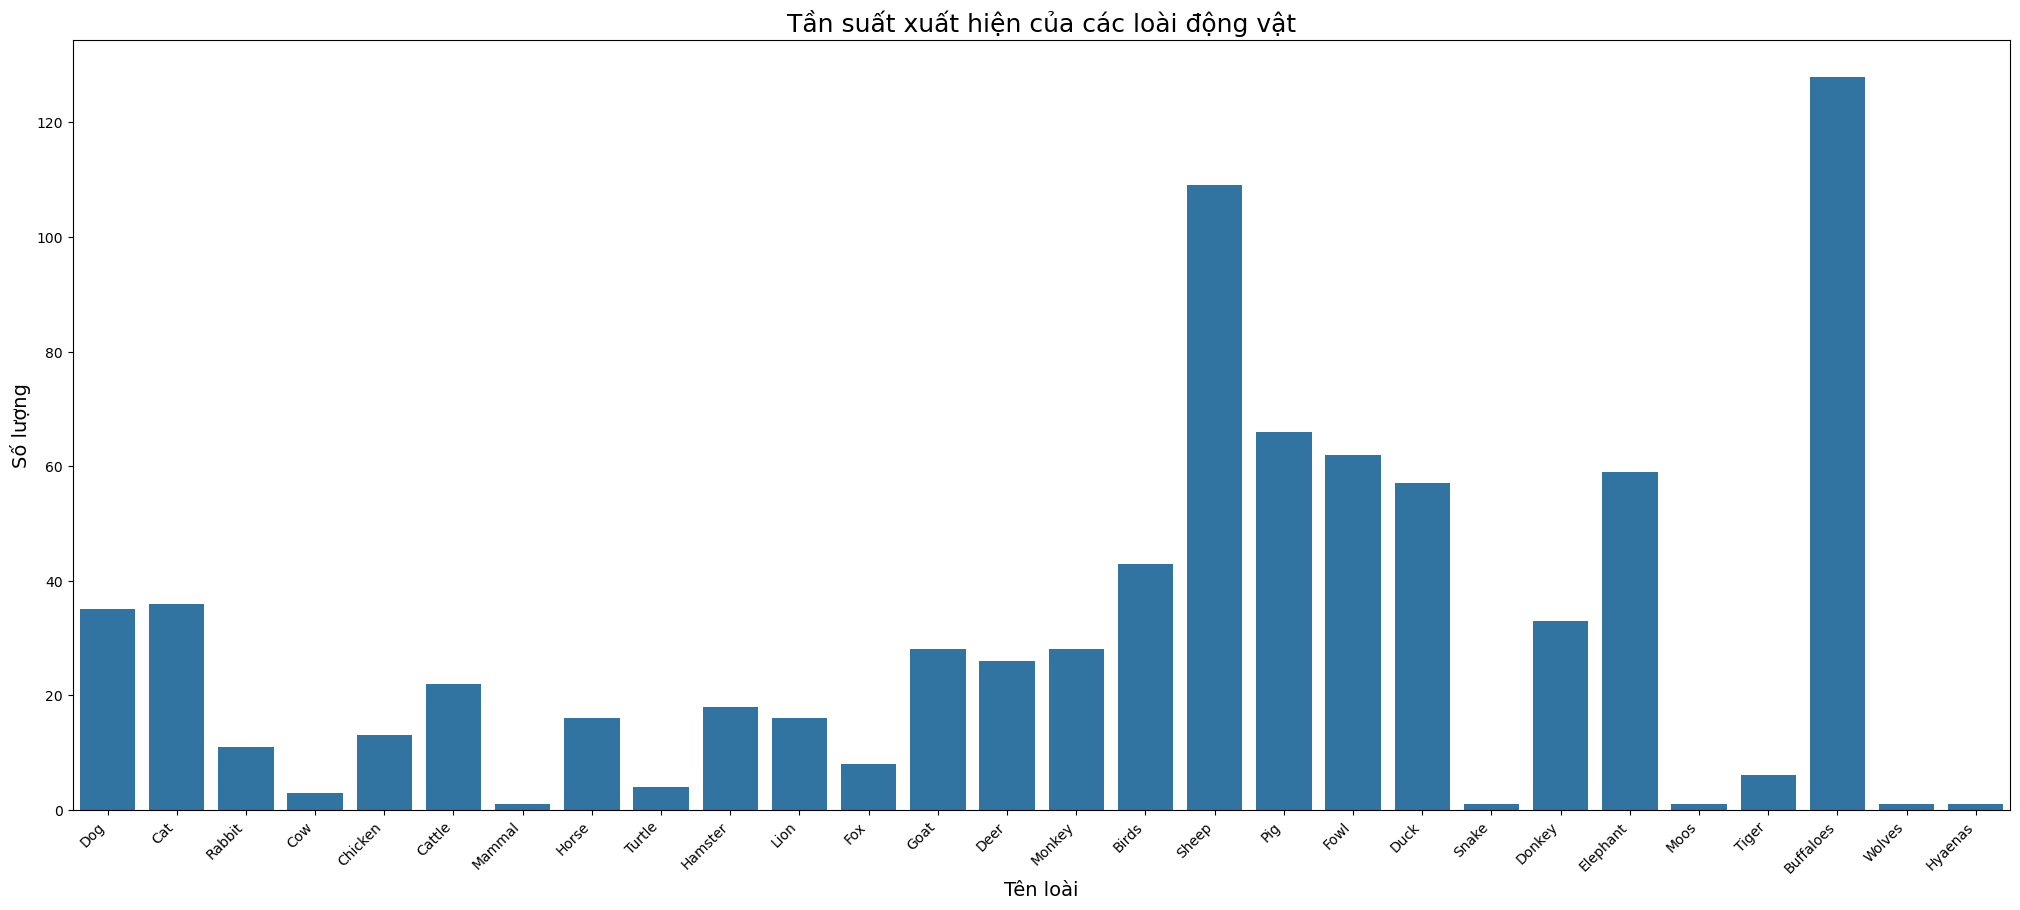

In [36]:
plt.figure(figsize=(25, 10))
sns.countplot(data=df, x='AnimalName')

plt.title('Tần suất xuất hiện của các loài động vật', fontsize=18)
plt.xlabel('Tên loài', fontsize=14)
plt.ylabel('Số lượng', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Lưu biểu đồ thành file ảnh
plt.savefig('animal_countplot.png', bbox_inches='tight', dpi=300)

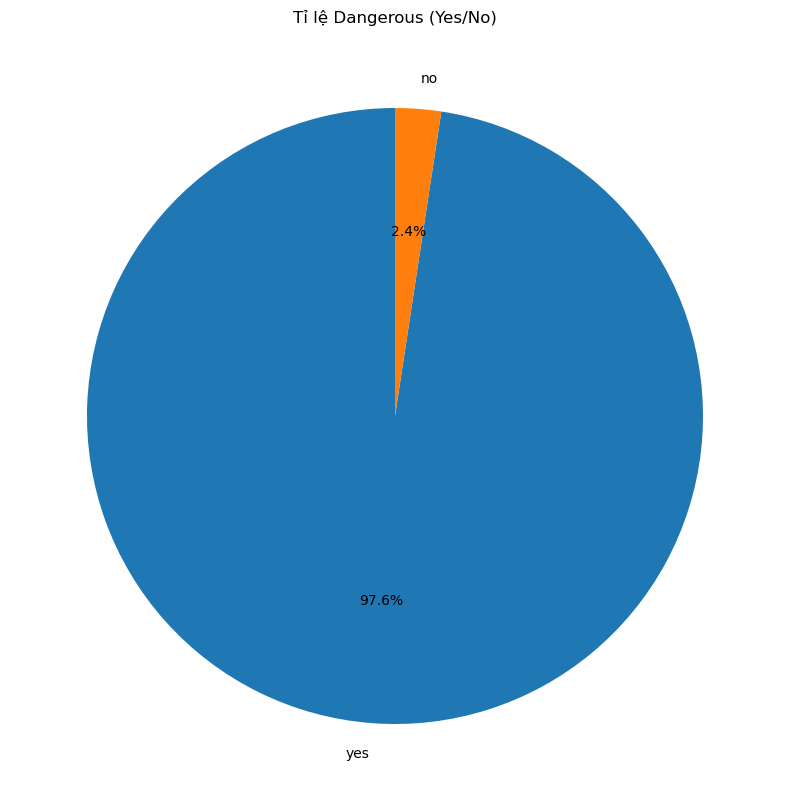

In [37]:
plt.figure(figsize=(10,10))
plt.pie(df.Dangerous.value_counts(), labels=['yes','no'], autopct='%1.1f%%', startangle=90)
plt.title('Tỉ lệ Dangerous (Yes/No)')
plt.savefig('dangerous_pie.png', bbox_inches='tight', dpi=300)  # Lưu ảnh
plt.show()


## Xây dựng mô hình

- SVM đều thực hiện các phép toán như cộng, nhân, tính khoảng cách.
- Máy không thể cộng 'Red' + 'Blue', nhưng có thể cộng 0 + 2.
- Ta cần chuyển mỗi giá trị khác nhau thành một số nguyên duy nhất.

In [44]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

le=LabelEncoder()

In [45]:
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

- Tiến hành lấy dữ liệu để chuẩn bị cho train model

In [46]:
X = df.iloc[:, :-1]   # Lấy tất cả cột trừ cột cuối cùng làm dữ liệu đầu vào (features)
y = df.iloc[:, -1]    # Lấy cột cuối cùng làm nhãn (target)

In [47]:
# TODO: Chia dữ liệu và nhãn thành 2 tập dữ liệu huấn luyện và dữ liệu kiểm tra theo tỉ lệ 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=101)

- Tạo mô hình SVM với dữ liệu đã được chọn

In [71]:
from sklearn.svm import SVC
# khởi tạo mô hình phân lớp
model_svm = SVC(kernel='linear', C=1.0)

# Sử dụng phương thức 'fit' để huấn luyện mô hình với dữ liệu huấn luyện và nhãn huấn luyện
# fit (X,Y) với X là tập các đối tượng, Y là tập nhãn tương ứng của đối tượng.
model_svm.fit(X_train, y_train)

SVC(kernel='linear')

In [72]:
# Tính độ chính xác trên tập huấn luyện và tập kiểm tra
train_acc = model_svm.score(X_train,y_train)
val_acc = model_svm.score(X_test,y_test)

print('Training accuracy: {}'.format(train_acc))

print('Validation accuracy: {}'.format(val_acc))

Training accuracy: 0.9804511278195489
Validation accuracy: 0.9580838323353293


In [64]:
# best_svm, best_val_acc và best_kernel lần lượt là các biến lưu mô hình tốt nhất,
# độ chính xác cao nhất trên tập kiểm tra và kernel tốt nhất
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
best_svm = None
best_val_acc = -1
best_kernel = None
# Huấn luyện các mô hình dựa trên dữ liệu huấn luyện và tham số kernel
# Tính toán độ chính xác trên tập huấn luyện và tập kiểm tra để tìm được mô hình tốt nhất
for i in range(4):
    model_svm = SVC(kernel=kernels[i], probability=True)
    model_svm.fit(X_train, y_train)
    tmp_val_acc = model_svm.score(X_test, y_test)
    if (tmp_val_acc > best_val_acc):
        best_val_acc = tmp_val_acc
        best_svm = model_svm
        best_kernel = kernels[i]

# Hiển thị mô hình tốt nhất cùng với độ chính xác
print("Best validation accuracy : {} with kernel: {}".format(best_val_acc,
best_kernel))
# Mô hình tốt nhất của bạn nên có độ chính xác xấp xỉ 86,67%

Best validation accuracy : 0.9580838323353293 with kernel: linear


In [73]:
y_pred = model_svm.predict(X_test)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [74]:
classification_rep_svm = classification_report(y_test, y_pred)
print(classification_rep_svm)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.96      1.00      0.98       160

    accuracy                           0.96       167
   macro avg       0.48      0.50      0.49       167
weighted avg       0.92      0.96      0.94       167



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


- **Class 0**: Mô hình không nhận ra được dữ liệu này (precision = 0, recall = 0).
- **Class 1**: Mô hình dự đoán tốt (precision = 0.96, recall = 1.00, f1 = 0.98).
- Mô hình bị lệch (biased) về lớp 1, vì dữ liệu cực kỳ mất cân bằng (7 mẫu class 0, 160 mẫu class 1).
- Accuracy = 0.96 → nghe thì cao, nhưng thực chất mô hình hầu như chỉ dự đoán class 1.
- Macro avg (tính trung bình đơn giản): 0.49 → cho thấy hiệu suất tổng thể thấp, vì class 0 gần như không được dự đoán.
- Weighted avg: 0.94 → bị ảnh hưởng nhiều bởi class lớn (class 1).
  > **Nhận xét**: Accuracy cao nhưng không phản ánh đúng hiệu suất dự đoán trên tất cả các lớp vì dataset bị mất cân bằng.